# Behavioral Experiment Results

For the experiment, we recruited the participants through [Prolific](https://www.prolific.co/).

In [1]:
#Importing some packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from glob import glob
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
import matplotlib
from pylab import cm
import matplotlib as mpl
matplotlib.font_manager._fmcache
matplotlib.font_manager._rebuild()
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.linewidth'] = 3

## 1) Compile and Filter Data

In [3]:
df_stimuli = pd.read_csv('../pilot_stimuli/pilot_stimuli.csv', index_col=0)
df_stimuli.drop(columns=['Path_1','FileName_1','Path_2','FileName_2'], inplace=True)
stimuli_columns = df_stimuli.columns.tolist()
stimuli_columns

['ID_1',
 'Scentence_1',
 'Sex_1',
 'ID_2',
 'Scentence_2',
 'Sex_2',
 'Distance_seuc',
 'Pair',
 'Distance_cos',
 'Distance_haus',
 'Distance_spear',
 'Distance_1-spear',
 'Score',
 'Dataset',
 'Order']

In [4]:
#read experiment file
df_data = pd.read_csv('/om2/user/gelbanna/prolific_data/data_exp_96310-v32_task-wqkb.csv', low_memory=False)
columns_of_interest = ['Participant Public ID', 'Screen Name', 'Zone Name', 'Reaction Time', 'Response'] + stimuli_columns
df_data.sample(10)

,Event Index,UTC Timestamp,UTC Date,Local Timestamp,Local Timezone,Local Date,Experiment ID,Experiment Version,Tree Node Key,Repeat Key,...,Sex_2,Distance_seuc,Pair,Distance_cos,Distance_haus,Distance_spear,Distance_1-spear,Score,Dataset,Order
5763,36,1.676050e+12,10/02/2023 17:26:46,1.676050e+12,-6.0,10/02/2023 11:26:46,96310.0,32.0,task-wqkb,NaN,...,F,-0.092516,Same,-0.034607,-0.090275,0.305175,0.694825,0.119357,VCTK,C-N
58227,298,1.676053e+12,10/02/2023 18:17:18,1.676053e+12,-6.0,10/02/2023 12:17:17,96310.0,32.0,task-wqkb,NaN,...,F,-0.123487,Same,-0.126606,-0.064340,0.251074,0.748926,0.108623,VCTK,N-C
79313,634,1.676315e+12,13/02/2023 18:58:26,1.676315e+12,-8.0,13/02/2023 10:58:25,96310.0,32.0,task-wqkb,NaN,...,M,-0.248304,Different,-0.238652,-0.184422,0.367741,0.632259,-0.009780,VCTK,N-C
79186,507,1.676314e+12,13/02/2023 18:54:30,1.676314e+12,-8.0,13/02/2023 10:54:29,96310.0,32.0,task-wqkb,NaN,...,M,-0.191679,Different,-0.135960,-0.169012,0.499069,0.500931,0.001070,VCTK,C-N
6675,233,1.676050e+12,10/02/2023 17:33:03,1.676050e+12,-6.0,10/02/2023 11:33:02,96310.0,32.0,task-wqkb,NaN,...,F,-0.138474,Different,-0.143012,-0.149542,0.435318,0.564682,0.033414,VCTK,N-C
64335,686,1.676056e+12,10/02/2023 19:11:57,1.676056e+12,0.0,10/02/2023 19:11:53,96310.0,32.0,task-wqkb,NaN,...,F,-0.083665,Same,-0.085834,-0.096514,0.117543,0.882457,0.154111,VCTK,C-N
29233,624,1.676052e+12,10/02/2023 18:00:54,1.676052e+12,-7.0,10/02/2023 11:00:55,96310.0,32.0,task-wqkb,NaN,...,F,-0.046720,Same,-0.062320,-0.013169,0.409421,0.590579,0.117092,VCTK,C-N
64427,61,1.676054e+12,10/02/2023 18:26:47,1.676054e+12,-7.0,10/02/2023 11:26:46,96310.0,32.0,task-wqkb,NaN,...,M,-0.065294,Same,-0.192503,-0.090645,0.123223,0.876777,0.132084,VCTK,C-N
19637,324,1.676051e+12,10/02/2023 17:45:34,1.676051e+12,-6.0,10/02/2023 11:45:33,96310.0,32.0,task-wqkb,NaN,...,M,-0.167831,Different,-0.239409,-0.241329,0.445982,0.554018,-0.023638,VCTK,C-N
3104,245,1.675975e+12,09/02/2023 20:39:46,1.675975e+12,-8.0,09/02/2023 12:39:47,96310.0,32.0,task-wqkb,NaN,...,M,-0.095414,Different,-0.245430,-0.199929,0.320745,0.679255,0.034620,VCTK,C-N


#### **Filter Columns**

In [5]:
#drop all columns except the ones of interest
df_data = df_data.loc[:, columns_of_interest]
df_data

,Participant Public ID,Screen Name,Zone Name,Reaction Time,Response,ID_1,Scentence_1,Sex_1,ID_2,Scentence_2,Sex_2,Distance_seuc,Pair,Distance_cos,Distance_haus,Distance_spear,Distance_1-spear,Score,Dataset,Order
0,632caf8315d959a1af838967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,632caf8315d959a1af838967,Screen 1,advancementZone,38709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,632caf8315d959a1af838967,Screen 1,Zone1,1,AUDIO PLAY REQUESTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,632caf8315d959a1af838967,Screen 1,Zone1,2823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,632caf8315d959a1af838967,Screen 2,Zone1,0,AUDIO PLAY REQUESTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86545,60c93f189082587ea79ce324,Audio_2,Zone1,2825,NaN,p310,131.0,F,p310,139.0,F,-0.119581,Same,-0.010628,-0.013524,0.249284,0.750716,0.151746,VCTK,N-C
86546,60c93f189082587ea79ce324,Decision,Different,1993.3999999994412,2,p310,131.0,F,p310,139.0,F,-0.119581,Same,-0.010628,-0.013524,0.249284,0.750716,0.151746,VCTK,N-C
86547,60c93f189082587ea79ce324,Screen 1,advancementZone,5839.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86548,60c93f189082587ea79ce324,NaN,NaN,1346359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Filter Rows**

In [6]:
#keep only the rows that show the subjects' response (100/speaker with total of 106 speakers = 10600 rows)
df_data = df_data.loc[df_data['Screen Name'] == 'Decision']
df_data['Reaction Time'] = df_data['Reaction Time'].astype(float)
df_data['Scentence_1'] = df_data['Scentence_1'].astype(int)
df_data['Scentence_2'] = df_data['Scentence_2'].astype(int)

/tmp/ipykernel_46404/1500745382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Reaction Time'] = df_data['Reaction Time'].astype(float)
/tmp/ipykernel_46404/1500745382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Scentence_1'] = df_data['Scentence_1'].astype(int)
/tmp/ipykernel_46404/1500745382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [7]:
df_data

,Participant Public ID,Screen Name,Zone Name,Reaction Time,Response,ID_1,Scentence_1,Sex_1,ID_2,Scentence_2,Sex_2,Distance_seuc,Pair,Distance_cos,Distance_haus,Distance_spear,Distance_1-spear,Score,Dataset,Order
16,632caf8315d959a1af838967,Decision,Different,2250.0,7,p237,43,M,p243,314,M,-0.139012,Different,-0.166663,-0.202966,0.402949,0.597051,0.022102,VCTK,N-C
23,632caf8315d959a1af838967,Decision,Same,3179.0,7,p292,266,M,p292,349,M,-0.051550,Same,-0.046071,-0.112541,0.359080,0.640920,0.107690,VCTK,C-N
30,632caf8315d959a1af838967,Decision,Different,3508.0,5,p259,365,M,p259,448,M,-0.092803,Same,-0.034297,-0.009083,0.078840,0.921160,0.196244,VCTK,C-N
37,632caf8315d959a1af838967,Decision,Same,1939.0,7,p318,277,F,p318,322,F,-0.145597,Same,-0.037927,-0.088886,0.294501,0.705499,0.108272,VCTK,C-N
44,632caf8315d959a1af838967,Decision,Different,1999.0,7,p228,163,F,p269,110,F,-0.111640,Different,-0.218158,-0.142772,0.366446,0.633554,0.040246,VCTK,N-C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86518,60c93f189082587ea79ce324,Decision,Different,926.9,7,p240,235,F,p261,362,F,-0.182286,Different,-0.241073,-0.221857,0.238521,0.761479,0.029066,VCTK,C-N
86525,60c93f189082587ea79ce324,Decision,Different,1698.5,7,p318,277,F,p318,322,F,-0.145597,Same,-0.037927,-0.088886,0.294501,0.705499,0.108272,VCTK,C-N
86532,60c93f189082587ea79ce324,Decision,Same,2096.8,3,p227,119,M,p259,77,M,-0.190037,Different,-0.249842,-0.131921,0.493739,0.506261,-0.016385,VCTK,C-N
86539,60c93f189082587ea79ce324,Decision,Different,2313.7,4,p239,245,F,p239,459,F,-0.053240,Same,-0.037786,-0.063568,0.401464,0.598536,0.110985,VCTK,N-C


#### Filter Approved Subjects

In [8]:
#read list of subjects' demographics
subjects_info = pd.read_csv('/om2/user/gelbanna/prolific_data/demographic_data.csv')
subjects_info.head(10)

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,63e54dbc853423abf3056725,632caf8315d959a1af838967,APPROVED,2023-02-09T19:48:10.246000Z,2023-02-09T20:27:07.334000Z,2023-02-09T21:39:04.705000,2023-02-09T20:27:07.720049Z,2338.0,CA6ATXUA,53,23,Male,White,United States,United States,United States,English,No,DATA_EXPIRED
1,63e552ddd45b14aa632a8b9a,5ff665fca89e1b2184bb1281,APPROVED,2023-02-09T20:09:15.969000Z,2023-02-09T20:38:52.650000Z,2023-02-09T21:39:09.770000,2023-02-09T20:38:52.998883Z,1777.0,CA6ATXUA,319,23,Male,Mixed,Peru,United States,United States,Spanish,DATA_EXPIRED,DATA_EXPIRED
2,63e5563cf1672a06fafc6698,5f4d3cb5fdda0b2c403fb801,APPROVED,2023-02-09T20:23:31.963000Z,2023-02-09T20:53:56.997000Z,2023-02-09T21:39:11.068000,2023-02-09T20:53:58.924057Z,1826.0,CA6ATXUA,489,25,Prefer not to say,Asian,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
3,63e5568dd3bcc76ae68c63e5,5dc916d584b21f64f98d61dd,APPROVED,2023-02-09T20:24:45.872000Z,2023-02-09T20:54:30.929000Z,2023-02-09T21:39:22.750000,2023-02-09T20:54:32.453753Z,1786.0,CA6ATXUA,601,30,Male,White,United States,United States,United States,English,Yes,Full-Time
4,63e556e8aa3ed92f3ff6d240,63e54774b0629d1ed9ce9a60,APPROVED,2023-02-09T20:26:36.034000Z,2023-02-09T20:52:43.873000Z,2023-02-09T21:39:24.410000,2023-02-09T20:52:44.297165Z,1568.0,CA6ATXUA,2,26,Male,White,DATA_EXPIRED,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
5,63e67ba84f73f04430bd2ddb,63e5a6690eeedc20da056717,APPROVED,2023-02-10T17:15:22.792000Z,2023-02-10T17:41:32.832000Z,2023-02-14T18:56:17.783000,2023-02-10T17:41:33.260903Z,1571.0,CA6ATXUA,8,38,Male,White,United States,United States,United States,English,No,DATA_EXPIRED
6,63e67bdc059c49bbca3a9737,6117efedb574017076d5b499,RETURNED,2023-02-10T17:16:18.957000Z,2023-02-10T17:39:38.840000Z,NaN,2023-02-10T17:39:39.176000Z,NaN,CA6ATXUA,1423,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED
7,63e67be4a287f90fa229c72f,5920b1f62b529b00013f3214,APPROVED,2023-02-10T17:16:20.330000Z,2023-02-10T17:46:54.150000Z,2023-02-14T19:00:05.023000,2023-02-10T17:46:54.523060Z,1834.0,CA6ATXUA,2041,59,Male,White,United States,United States,United States,English,No,Full-Time
8,63e67beb26c2cb4439bd2e1e,60f989f2b726f86c3d24e13e,RETURNED,2023-02-10T17:16:33.431000Z,2023-02-10T18:02:56.423000Z,NaN,2023-02-10T18:02:57.619000Z,NaN,CA6ATXUA,1594,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED
9,63e67c271570665813f6600b,62d76226d4848594e77ef056,REJECTED,2023-02-10T17:17:27.734000Z,2023-02-10T18:20:29.719000Z,2023-02-13T17:15:58.383000Z,2023-02-10T18:20:30.777000Z,3782.0,CA6ATXUA,361,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED


In [9]:
#select approved subjects
approved_sub = subjects_info.loc[subjects_info.Status=='APPROVED']
approved_sub = approved_sub[['Participant id', 'Time taken', 'Age', 'Sex', 'Ethnicity simplified', 'Language']]
approved_sub

,Participant id,Time taken,Age,Sex,Ethnicity simplified,Language
0,632caf8315d959a1af838967,2338.0,23,Male,White,English
1,5ff665fca89e1b2184bb1281,1777.0,23,Male,Mixed,Spanish
2,5f4d3cb5fdda0b2c403fb801,1826.0,25,Prefer not to say,Asian,English
3,5dc916d584b21f64f98d61dd,1786.0,30,Male,White,English
4,63e54774b0629d1ed9ce9a60,1568.0,26,Male,White,English
...,...,...,...,...,...,...
119,63ea61ebeb113fbc8d6f4b76,1665.0,41,Male,White,English
120,5debfbf55c91a42e76279333,1603.0,22,Male,White,DATA_EXPIRED
121,5ff3a4960a5e7fa0d5a8cb61,1583.0,25,Male,Asian,English
122,60c93f189082587ea79ce324,2106.0,26,Female,Mixed,English


In [10]:
df_data = df_data.merge(approved_sub, left_on='Participant Public ID', right_on='Participant id')
df_data

,Participant Public ID,Screen Name,Zone Name,Reaction Time,Response,ID_1,Scentence_1,Sex_1,ID_2,Scentence_2,...,Distance_1-spear,Score,Dataset,Order,Participant id,Time taken,Age,Sex,Ethnicity simplified,Language
0,632caf8315d959a1af838967,Decision,Different,2250.0,7,p237,43,M,p243,314,...,0.597051,0.022102,VCTK,N-C,632caf8315d959a1af838967,2338.0,23,Male,White,English
1,632caf8315d959a1af838967,Decision,Same,3179.0,7,p292,266,M,p292,349,...,0.640920,0.107690,VCTK,C-N,632caf8315d959a1af838967,2338.0,23,Male,White,English
2,632caf8315d959a1af838967,Decision,Different,3508.0,5,p259,365,M,p259,448,...,0.921160,0.196244,VCTK,C-N,632caf8315d959a1af838967,2338.0,23,Male,White,English
3,632caf8315d959a1af838967,Decision,Same,1939.0,7,p318,277,F,p318,322,...,0.705499,0.108272,VCTK,C-N,632caf8315d959a1af838967,2338.0,23,Male,White,English
4,632caf8315d959a1af838967,Decision,Different,1999.0,7,p228,163,F,p269,110,...,0.633554,0.040246,VCTK,N-C,632caf8315d959a1af838967,2338.0,23,Male,White,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,60c93f189082587ea79ce324,Decision,Different,926.9,7,p240,235,F,p261,362,...,0.761479,0.029066,VCTK,C-N,60c93f189082587ea79ce324,2106.0,26,Female,Mixed,English
10496,60c93f189082587ea79ce324,Decision,Different,1698.5,7,p318,277,F,p318,322,...,0.705499,0.108272,VCTK,C-N,60c93f189082587ea79ce324,2106.0,26,Female,Mixed,English
10497,60c93f189082587ea79ce324,Decision,Same,2096.8,3,p227,119,M,p259,77,...,0.506261,-0.016385,VCTK,C-N,60c93f189082587ea79ce324,2106.0,26,Female,Mixed,English
10498,60c93f189082587ea79ce324,Decision,Different,2313.7,4,p239,245,F,p239,459,...,0.598536,0.110985,VCTK,N-C,60c93f189082587ea79ce324,2106.0,26,Female,Mixed,English


In [11]:
def compute_dprime(subject_data):
    true_diff = subject_data.apply(lambda x: 1 if x['Zone Name'] == 'Different' and x['Zone Name'] == x['Pair'] else 0, axis=1).sum()
    true_same = subject_data.apply(lambda x: 1 if x['Zone Name'] == 'Same' and x['Zone Name'] == x['Pair'] else 0, axis=1).sum()
    # z-scores
    hitZ = stats.norm.ppf(true_diff/50)
    faZ  = stats.norm.ppf((50-true_same)/50)
    return hitZ-faZ

def f(x):
    d = {}
    d['Accuracy'] = len(x[x['Zone Name'] == x['Pair']])
    d['Mean_Reaction_Time'] = np.mean(x['Reaction Time'])
    true_diff = x.apply(lambda x: 1 if x['Zone Name'] == 'Different' and x['Zone Name'] == x['Pair'] else 0, axis=1).sum()
    true_same = x.apply(lambda x: 1 if x['Zone Name'] == 'Same' and x['Zone Name'] == x['Pair'] else 0, axis=1).sum()
    d['True_Different'] = true_diff/50
    d['True_Same'] = true_same/50
    d['d_prime'] = compute_dprime(x)
    return pd.Series(d, index=['Accuracy', 'Mean_Reaction_Time', 'True_Different', 'True_Same', 'd_prime'])
#group data by subject ID and compute accuracy per subject
subjects_results = df_data.groupby('Participant Public ID').apply(f)

In [12]:
subjects_results = subjects_results.sort_values(by='d_prime', ascending=False).reset_index()
subjects_results = subjects_results.merge(approved_sub, left_on='Participant Public ID', right_on='Participant id')
subjects_results

,Participant Public ID,Accuracy,Mean_Reaction_Time,True_Different,True_Same,d_prime,Participant id,Time taken,Age,Sex,Ethnicity simplified,Language
0,60ce4fceb13609a2c039248e,82.0,1793.080,1.00,0.64,inf,60ce4fceb13609a2c039248e,1957.0,38,Male,White,English
1,5d1555fe628de0001966c2fa,91.0,1651.530,0.90,0.92,2.686623,5d1555fe628de0001966c2fa,1584.0,24,Female,White,English
2,63d7aa4a4f19508a5401cc2a,90.0,2016.880,0.92,0.88,2.580058,63d7aa4a4f19508a5401cc2a,1458.0,23,Male,White,English
3,5be8eaff0e366e00017616ad,87.0,2425.132,0.96,0.78,2.522879,5be8eaff0e366e00017616ad,1554.0,28,Male,Black,English
4,59025dfc57d9f20001bc66e3,83.0,1379.828,0.68,0.98,2.521448,59025dfc57d9f20001bc66e3,2318.0,37,Male,Black,English
...,...,...,...,...,...,...,...,...,...,...,...,...
100,6095d1be2f663b205d047133,66.0,2271.251,0.62,0.70,0.829881,6095d1be2f663b205d047133,1425.0,29,Male,Other,English
101,5b15d20c444cef0001cb1153,66.0,2835.005,0.68,0.64,0.826158,5b15d20c444cef0001cb1153,2926.0,38,Male,Black,English
102,5dd31c4a92371d32f2fa607a,66.0,1959.320,0.66,0.66,0.824926,5dd31c4a92371d32f2fa607a,1667.0,DATA_EXPIRED,DATA_EXPIRED,DATA_EXPIRED,DATA_EXPIRED
103,5faeb8eb6562cd0163f216ec,62.0,4617.460,0.88,0.36,0.816528,5faeb8eb6562cd0163f216ec,1778.0,28,Male,Asian,English


## 2) Descriptive Statistics

#### **Gender**

In [15]:
subjects_results['Sex'] = subjects_results.Sex.str.replace('DATA_EXPIRED', 'Prefer not to say')
subjects_results.Sex.value_counts()

Male                 67
Female               36
Prefer not to say     2
Name: Sex, dtype: int64

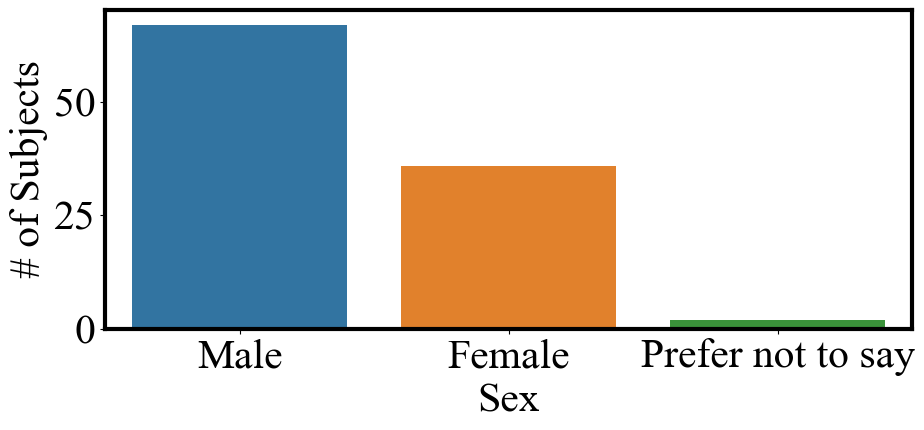

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=subjects_results, x='Sex', ax=ax)
ax.set_ylabel('# of Subjects')
ax.set_xlabel('Sex')
plt.tight_layout()
plt.savefig('sex_statistics.png')

#### **Age**

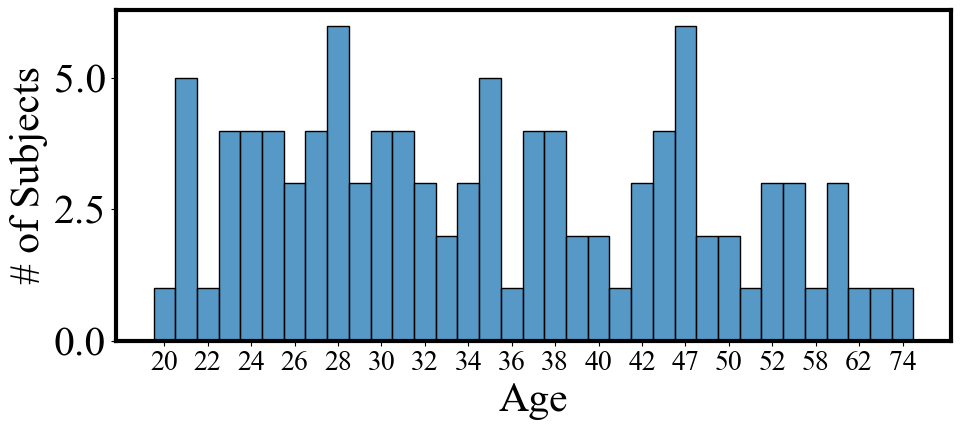

In [17]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
age_data = subjects_results.loc[subjects_results.Age!='DATA_EXPIRED'].sort_values(by='Age')
hist = sns.histplot(data=age_data.Age, ax=ax)
ax.set_ylabel('# of Subjects')
ax.set_xlabel('Age')
hist.xaxis.set_major_locator(ticker.LinearLocator(28))
ax.set_xticks(age_data.Age.unique()[::2])
ax.set_xticklabels(age_data.Age.unique()[::2], fontsize=20)
plt.tight_layout()
plt.savefig('age_statistics.png')

In [18]:
print(f"Average Age across Subjects: {age_data.Age.astype(int).mean():.2f}\u00B1{age_data.Age.astype(int).std():.2f}")

Average Age across Subjects: 36.46±11.80


#### **Race**

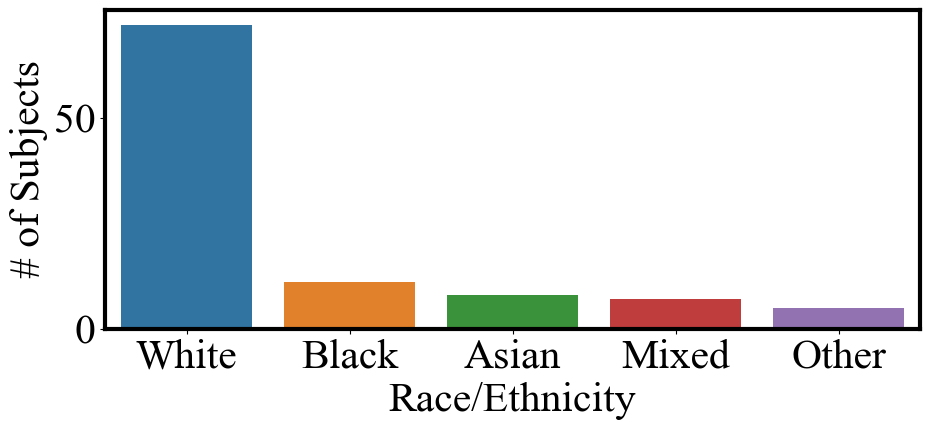

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
race_data = subjects_results.loc[subjects_results['Ethnicity simplified']!='DATA_EXPIRED']
large_to_small = race_data.groupby('Ethnicity simplified').size().sort_values().index[::-1]
sns.countplot(data=race_data, x='Ethnicity simplified', ax=ax, order=large_to_small)
ax.set_ylabel('# of Subjects')
ax.set_xlabel('Race/Ethnicity')
plt.tight_layout()
plt.savefig('race_statistics.png')

In [20]:
race_data['Ethnicity simplified'].value_counts()

White    72
Black    11
Asian     8
Mixed     7
Other     5
Name: Ethnicity simplified, dtype: int64

## 3) Performance Summary

In [14]:
d_prime = subjects_results.d_prime.iloc[1:]
react_time_sec = subjects_results.Mean_Reaction_Time/1e3

In [15]:
print(f"Average Accuracy across Subjects: {subjects_results.Accuracy.mean():.2f}\u00B1{subjects_results.Accuracy.std():.2f}")
print(f"Average d' prime across Subjects: {d_prime.mean():.2f}\u00B1{d_prime.std():.2f}")
print(f"Average Reaction Time across Subjects: {react_time_sec.mean():.2f}\u00B1{react_time_sec.std():.2f}")

Average Accuracy across Subjects: 78.21±6.56
Average d' prime across Subjects: 1.68±0.48
Average Reaction Time across Subjects: 2.59±1.27


## 4) Telling People *Together* vs. *Apart*

In [17]:
import math
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [18]:
data = pd.melt(subjects_results, id_vars=['Participant Public ID'], value_vars=['True_Different', 'True_Same'])
data.value *= 100

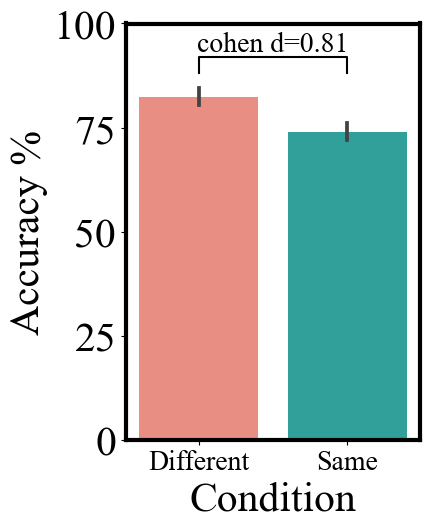

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
palette = {'True_Different':'salmon', 'True_Same':'lightseagreen'}
sns.barplot(data=data, y='value', x='variable', ax=ax, palette=palette)
ax.set_ylabel('Accuracy %')
ax.set_ylim([0,100])
ax.set_xlabel('Condition')
ax.set_xticklabels(['Different', 'Same'], fontsize=20)

#compute effect size
d=cohend(data['value'].loc[(data.variable=='True_Different')], data['value'].loc[(data.variable=='True_Same')])
y, h, col = 88, 4, 'k'
ax.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text(.5, y+(h), f'cohen d={d:.2}', ha='center', va='bottom', color=col, fontsize=20)
plt.tight_layout()
plt.savefig('same_different_performance.png')

In [13]:
def f(x):
    d = {}
    d['Pair'] = x['Pair'].unique()[0]
    d['Accuracy'] = (len(x[x['Zone Name'] == x['Pair']])/len(x))*100
    return pd.Series(d, index=['Accuracy', 'Pair'])

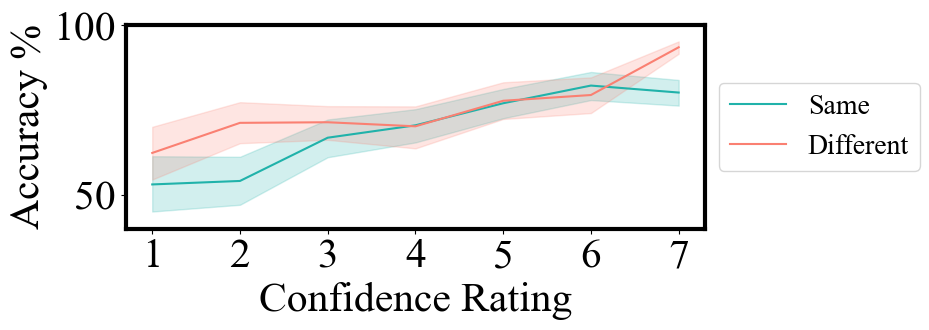

In [21]:
true_response_conf = df_data.groupby(['Participant Public ID', 'Pair', 'Response']).apply(f).reset_index().sort_values(by='Response')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
palette = {'Different':'salmon', 'Same':'lightseagreen'}
sns.lineplot(data=true_response_conf, x='Response', y='Accuracy', hue='Pair', ax=ax, palette=palette)
ax.set_ylabel('Accuracy %')
ax.set_ylim([40,100])
ax.set_xlabel('Confidence Rating')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.tight_layout()
plt.savefig('confidence_same_different.png')

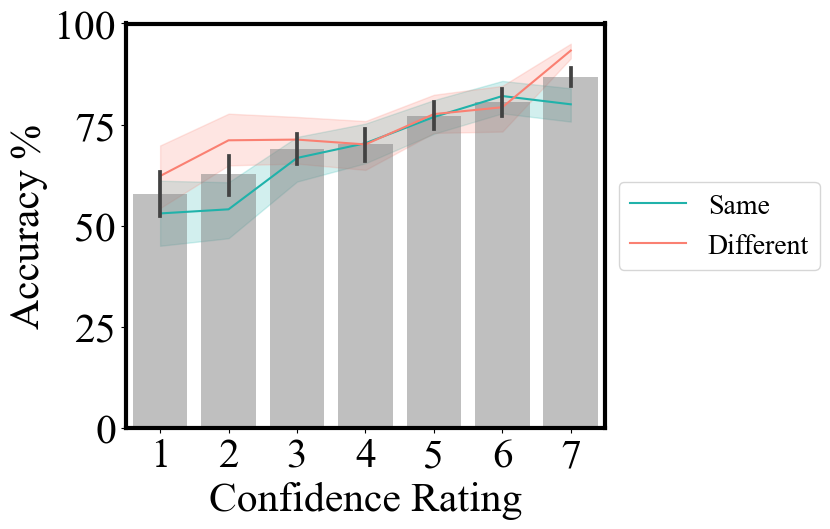

In [37]:
true_response_conf = df_data.groupby(['Participant Public ID', 'Pair', 'Response']).apply(f).reset_index().sort_values(by='Response')
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
palette = {'Different':'salmon', 'Same':'lightseagreen'}
sns.lineplot(data=true_response_conf, x='Response', y='Accuracy', hue='Pair', ax=ax, palette=palette)
sns.barplot(data=true_response_conf, x='Response', y='Accuracy', ax=ax, alpha=0.5, color='grey')
ax.set_ylabel('Accuracy %')
ax.set_ylim([0,100])
ax.set_xlabel('Confidence Rating')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.tight_layout()
plt.savefig('confidence_same_different.png')

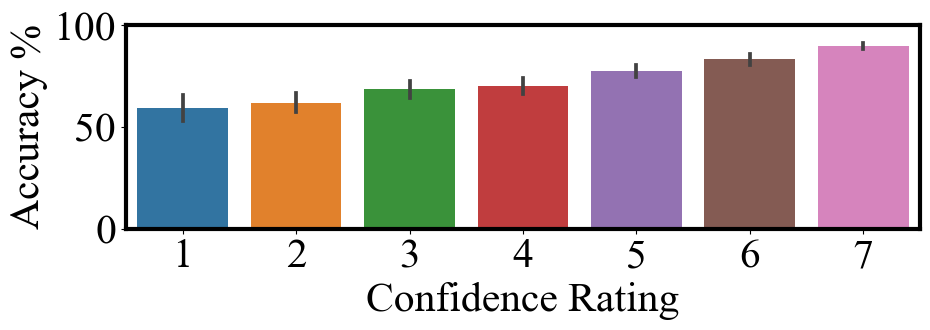

In [30]:
true_response_conf = df_data.groupby(['Participant Public ID', 'Response']).apply(f).reset_index().sort_values(by='Response')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.barplot(data=true_response_conf, x='Response', y='Accuracy', ax=ax)
ax.set_ylabel('Accuracy %')
ax.set_ylim([0,100])
ax.set_xlabel('Confidence Rating')
plt.tight_layout()
plt.savefig('confidence_performance.png')

## 5) Effect of order of Bkg. Noise

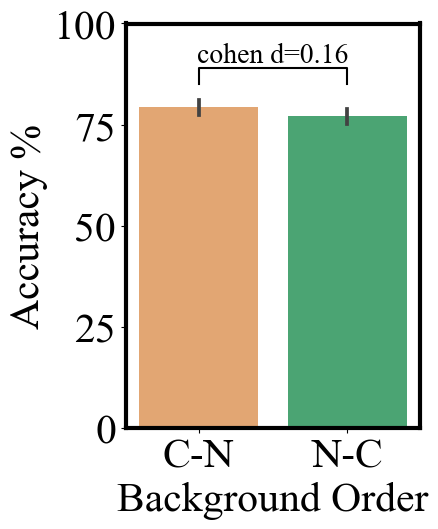

In [25]:
true_response_conf = df_data.groupby(['Participant Public ID', 'Pair', 'Order']).apply(f).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
palette = {'N-C':'mediumseagreen', 'C-N':'sandybrown'}
sns.barplot(data=true_response_conf, x='Order', y='Accuracy', ax=ax, palette=palette)
ax.set_ylabel('Accuracy %')
ax.set_ylim([0,100])
ax.set_xlabel('Background Order')

#compute effect size
d=cohend(true_response_conf['Accuracy'].loc[(true_response_conf.Order=='C-N')], true_response_conf['Accuracy'].loc[(true_response_conf.Order=='N-C')])
y, h, col = 85, 4, 'k'
ax.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text(.5, y+(h), f'cohen d={d:.2}', ha='center', va='bottom', color=col, fontsize=20)
plt.tight_layout()
plt.savefig('noise_order_performance.png')

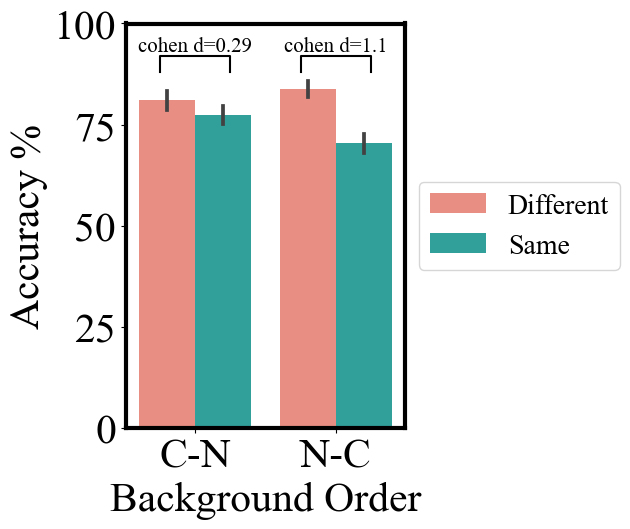

In [26]:
true_response_conf = df_data.groupby(['Participant Public ID', 'Pair', 'Order']).apply(f).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
palette = {'Different':'salmon', 'Same':'lightseagreen'}
sns.barplot(data=true_response_conf, x='Order', y='Accuracy', hue='Pair', ax=ax, palette=palette)
ax.set_ylabel('Accuracy %')
ax.set_ylim([0,100])
ax.set_xlabel('Background Order')

#compute effect size
d_cn=cohend(true_response_conf['Accuracy'].loc[(true_response_conf.Order=='C-N')&(true_response_conf.Pair=='Different')], true_response_conf['Accuracy'].loc[(true_response_conf.Order=='C-N')&(true_response_conf.Pair=='Same')])
d_nc=cohend(true_response_conf['Accuracy'].loc[(true_response_conf.Order=='N-C')&(true_response_conf.Pair=='Different')], true_response_conf['Accuracy'].loc[(true_response_conf.Order=='N-C')&(true_response_conf.Pair=='Same')])
y, h, col = 88, 4, 'k'
ax.plot([-0.25, -0.25, 0.25, 0.25], [y, y+h, y+h, y], lw=1.5, c=col)
ax.plot([0.75, 0.75, 1.25, 1.25], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text(0, y+(h), f'cohen d={d_cn:.2}', ha='center', va='bottom', color=col, fontsize=15)
ax.text(1, y+(h), f'cohen d={d_nc:.2}', ha='center', va='bottom', color=col, fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.tight_layout()
plt.savefig('noise_order_same_different.png')

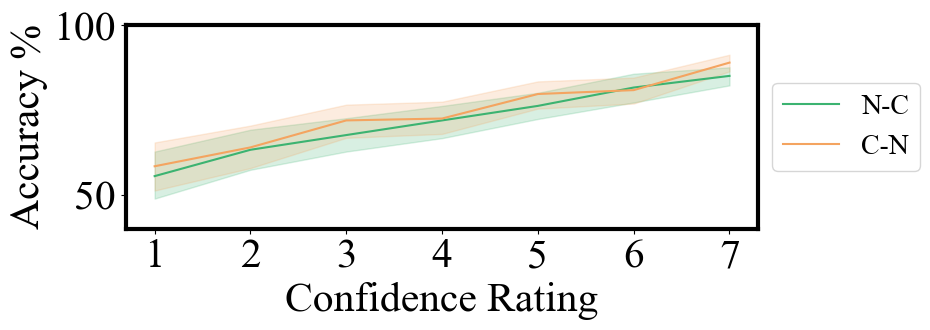

In [27]:
true_response_conf = df_data.groupby(['Participant Public ID', 'Order', 'Response', 'Pair']).apply(f).reset_index().sort_values(by='Response')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
palette = {'N-C':'mediumseagreen', 'C-N':'sandybrown'}
sns.lineplot(data=true_response_conf, x='Response', y='Accuracy', hue='Order', ax=ax, palette=palette)
ax.set_ylabel('Accuracy %')
ax.set_ylim([40,100])
ax.set_xlabel('Confidence Rating')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.tight_layout()
plt.savefig('confidence_noise_order.png')

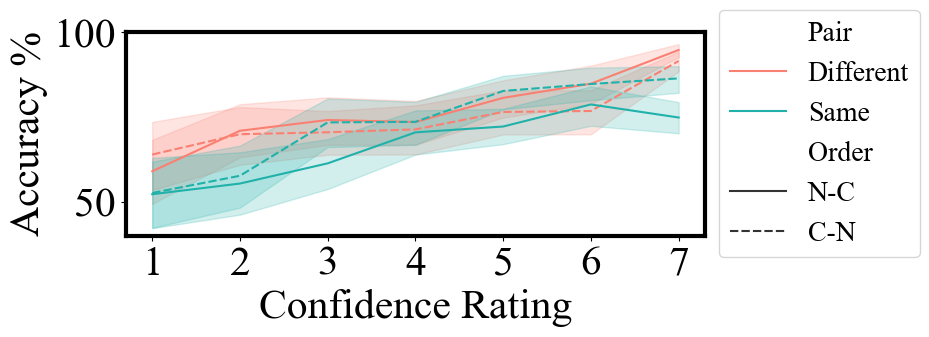

In [28]:
true_response_conf = df_data.groupby(['Participant Public ID', 'Order', 'Response', 'Pair']).apply(f).reset_index().sort_values(by='Response')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
palette = {'Different':'salmon', 'Same':'lightseagreen'}
sns.lineplot(data=true_response_conf, x='Response', y='Accuracy', hue='Pair', style='Order', ax=ax, palette=palette)
ax.set_ylabel('Accuracy %')
ax.set_ylim([40,100])
ax.set_xlabel('Confidence Rating')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.tight_layout()
plt.savefig('confidence_noise_order_response.png')

## 6) Distance Metric and Performance

#### **Euclidean**

-0.029840474983953452 0.7682087767084329


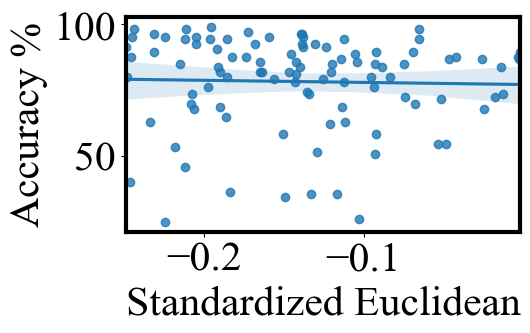

In [42]:
true_response_conf = df_data.groupby('Distance_seuc').apply(f).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
r, p = stats.pearsonr(true_response_conf['Distance_seuc'], true_response_conf['Accuracy'])
sns.regplot(data=true_response_conf, x='Distance_seuc', y='Accuracy', ax=ax)
print(r,p)
# ax.text(true_response_conf['Distance_seuc'].max(), true_response_conf['Accuracy'].mean(), f"r={r:.2f}, p={p:.2f}", fontsize=15)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Standardized Euclidean')
plt.tight_layout()
plt.savefig('euc_performance.png')

In [59]:
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Same']['Distance_seuc'], true_response_conf.loc[true_response_conf.Pair=='Same']['Accuracy'])
print('Same',r,p)
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Different']['Distance_seuc'], true_response_conf.loc[true_response_conf.Pair=='Different']['Accuracy'])
print('Different',r,p)

Same 0.2268330719867172 0.11316869184090303
Different 0.028051567167231124 0.8466648579482191


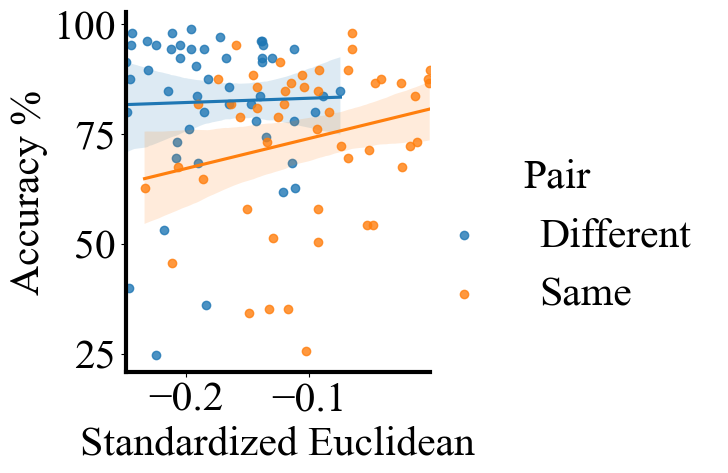

In [68]:
true_response_conf = df_data.groupby('Distance_seuc').apply(f).reset_index()
plot = sns.lmplot(data=true_response_conf, x='Distance_seuc', y='Accuracy', hue='Pair', legend_out=True)
plot.set_ylabels('Accuracy %')
plot.set_xlabels('Standardized Euclidean')
plt.savefig('euc_pair_performance.png')

#### **Cosine**

-0.22163551354391217 0.026682658269012248


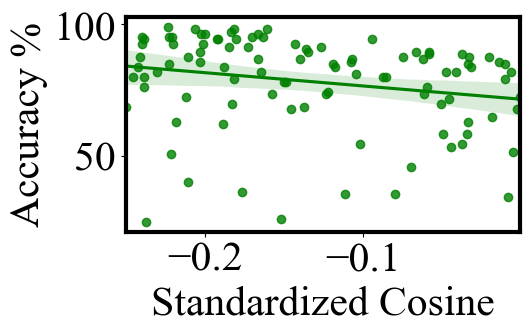

In [43]:
true_response_conf = df_data.groupby('Distance_cos').apply(f).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
r, p = stats.pearsonr(true_response_conf['Distance_cos'], true_response_conf['Accuracy'])
sns.regplot(data=true_response_conf, x='Distance_cos', y='Accuracy', ax=ax, color='green')
print(r,p)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Standardized Cosine')
plt.tight_layout()
plt.savefig('cosine_performance.png')

In [70]:
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Same']['Distance_cos'], true_response_conf.loc[true_response_conf.Pair=='Same']['Accuracy'])
print('Same',r,p)
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Different']['Distance_cos'], true_response_conf.loc[true_response_conf.Pair=='Different']['Accuracy'])
print('Different',r,p)

Same -0.08255762485729477 0.5686914151098851
Different -0.058456422821825546 0.6867719115934209


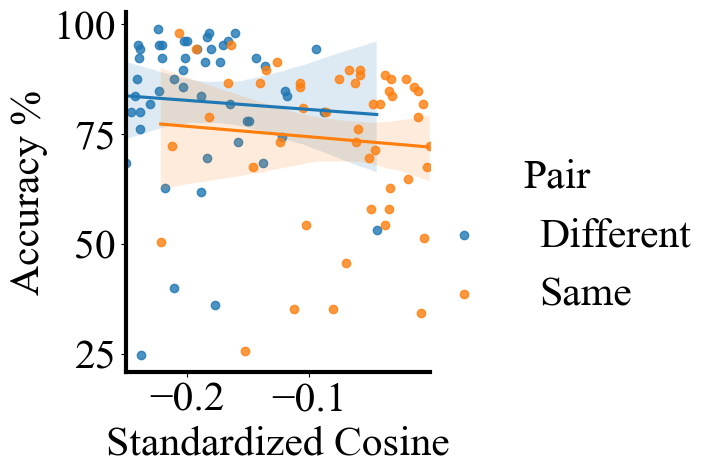

In [69]:
true_response_conf = df_data.groupby('Distance_cos').apply(f).reset_index()
plot = sns.lmplot(data=true_response_conf, x='Distance_cos', y='Accuracy', hue='Pair', legend_out=True)
plot.set_ylabels('Accuracy %')
plot.set_xlabels('Standardized Cosine')
plt.savefig('cos_pair_performance.png')

#### **Hausdorff**

In [48]:
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Same']['Distance_haus'], true_response_conf.loc[true_response_conf.Pair=='Same']['Accuracy'])
print('Same',r,p)
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Different']['Distance_haus'], true_response_conf.loc[true_response_conf.Pair=='Different']['Accuracy'])
print('Different',r,p)

Same -0.1246180154659504 0.38854279129493835
Different -0.1630715176511012 0.25783675300479464


-0.2783800140165019 0.005040048508091544


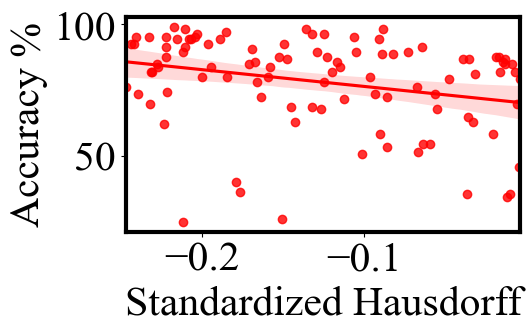

In [47]:
true_response_conf = df_data.groupby('Distance_haus').apply(f).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
r, p = stats.pearsonr(true_response_conf['Distance_haus'], true_response_conf['Accuracy'])
sns.regplot(data=true_response_conf, x='Distance_haus', y='Accuracy', ax=ax, color='red')
print(r,p)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Standardized Hausdorff')
plt.tight_layout()
plt.savefig('haus_performance.png')

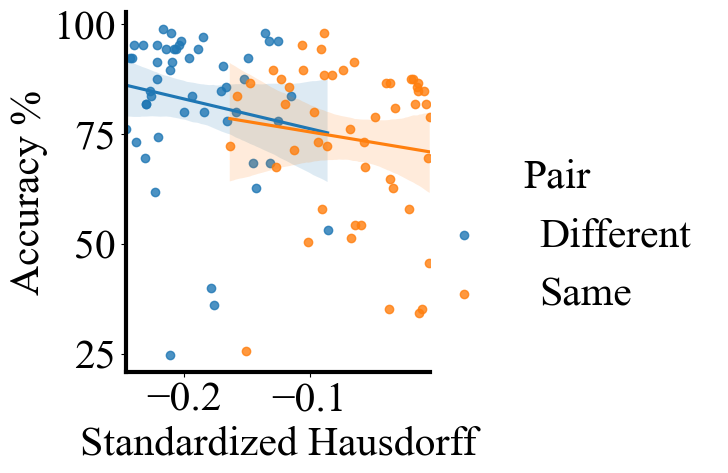

In [71]:
true_response_conf = df_data.groupby('Distance_haus').apply(f).reset_index()
plot = sns.lmplot(data=true_response_conf, x='Distance_haus', y='Accuracy', hue='Pair', legend_out=True)
plot.set_ylabels('Accuracy %')
plot.set_xlabels('Standardized Hausdorff')
plt.savefig('haus_pair_performance.png')

#### **Spearman**

0.1589109808167507 0.11429404210640895


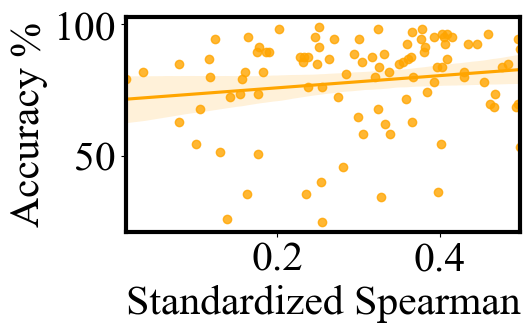

In [45]:
true_response_conf = df_data.groupby('Distance_spear').apply(f).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
r, p = stats.pearsonr(true_response_conf['Distance_spear'], true_response_conf['Accuracy'])
sns.regplot(data=true_response_conf, x='Distance_spear', y='Accuracy', ax=ax, color='orange')
print(r,p)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Standardized Spearman')
plt.tight_layout()
plt.savefig('spear_performance.png')

In [73]:
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Same']['Distance_spear'], true_response_conf.loc[true_response_conf.Pair=='Same']['Accuracy'])
print('Same',r,p)
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Different']['Distance_spear'], true_response_conf.loc[true_response_conf.Pair=='Different']['Accuracy'])
print('Different',r,p)

Same -0.013132091020206828 0.9278794786678501
Different 0.025725747496985737 0.8592438567578259


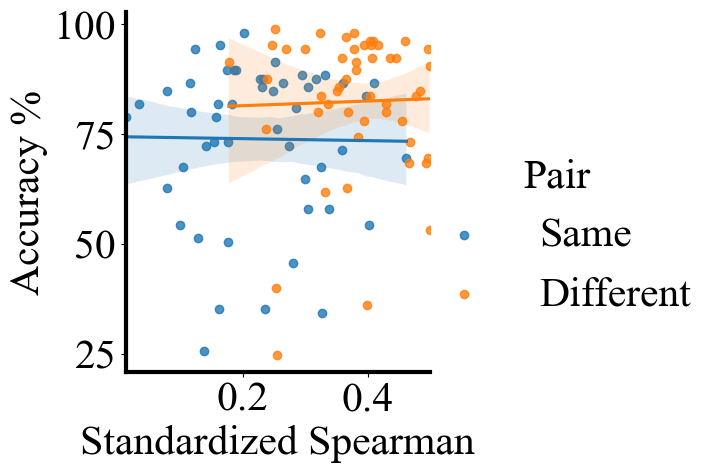

In [72]:
true_response_conf = df_data.groupby('Distance_spear').apply(f).reset_index()
plot = sns.lmplot(data=true_response_conf, x='Distance_spear', y='Accuracy', hue='Pair', legend_out=True)
plot.set_ylabels('Accuracy %')
plot.set_xlabels('Standardized Spearman')
plt.savefig('spear_pair_performance.png')

#### **Average Score**

-0.2369150309572922 0.01763199451382917


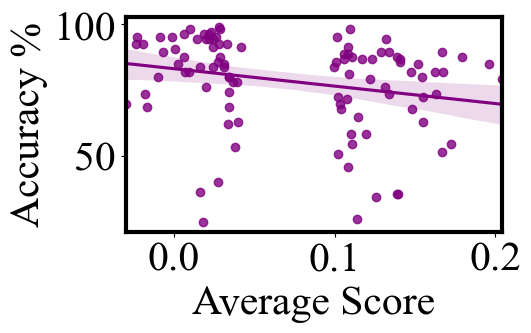

In [52]:
true_response_conf = df_data.groupby('Score').apply(f).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
r, p = stats.pearsonr(true_response_conf['Score'], true_response_conf['Accuracy'])
sns.regplot(data=true_response_conf, x='Score', y='Accuracy', ax=ax, color='purple')
print(r,p)
ax.set_ylabel('Accuracy %')
ax.set_xlabel('Average Score')
plt.tight_layout()
plt.savefig('score_performance.png')

In [75]:
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Same']['Score'], true_response_conf.loc[true_response_conf.Pair=='Same']['Accuracy'])
print('Same',r,p)
r, p = stats.pearsonr(true_response_conf.loc[true_response_conf.Pair=='Different']['Score'], true_response_conf.loc[true_response_conf.Pair=='Different']['Accuracy'])
print('Different',r,p)

Same 0.03569982305597131 0.8055820241039593
Different -0.12960822350843132 0.3696760221710751


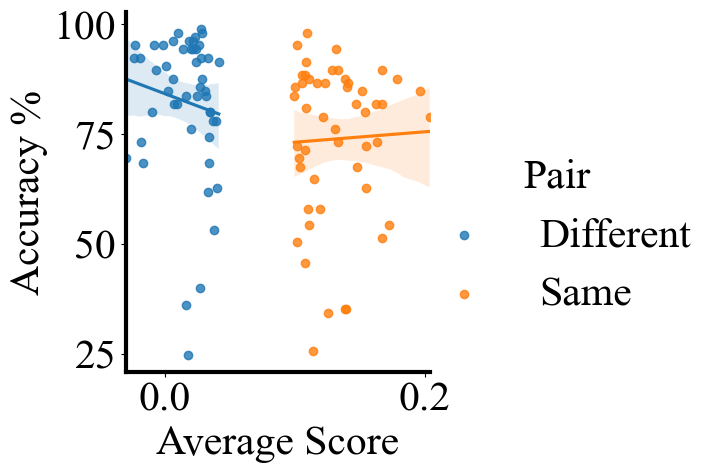

In [14]:
true_response_conf = df_data.groupby('Score').apply(f).reset_index()
plot = sns.lmplot(data=true_response_conf, x='Score', y='Accuracy', hue='Pair', legend_out=True)
plot.set_ylabels('Accuracy %')
plot.set_xlabels('Average Score')
plt.savefig('score_pair_performance.png')

In [30]:
def f(x):
    d = {}
    d['Accuracy'] = (len(x[x['Zone Name'] == x['Pair']])/len(x))*100
    d['Confidence'] = x['Response'].astype(int).mean()
    d['Stimulus'] = x['Pair'].unique()[0]
    return pd.Series(d, index=['Accuracy', 'Confidence', 'Stimulus'])
df_data['Trial'] = df_data.ID_1+'_'+df_data.Scentence_1.astype(str)+'_'+df_data.ID_2+'_'+df_data.Scentence_2.astype(str)+'_'+df_data.Order

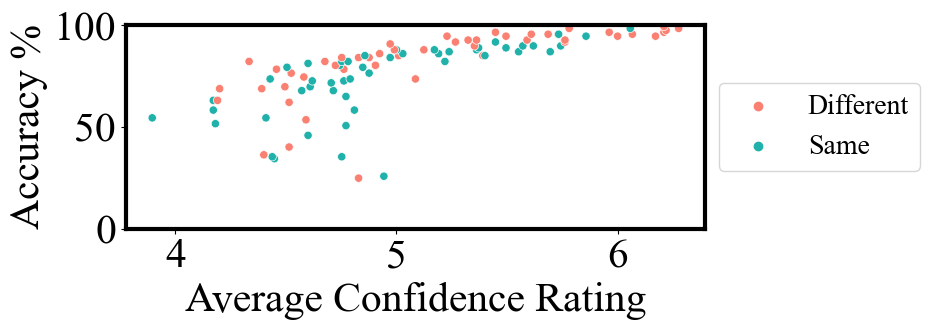

In [23]:
true_response_conf = df_data.groupby('Trial').apply(f).reset_index().sort_values(by='Accuracy')
palette = {'Different':'salmon', 'Same':'lightseagreen'}
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.scatterplot(data=true_response_conf, x='Confidence', y='Accuracy', hue='Stimulus', ax=ax, palette=palette)
ax.set_ylabel('Accuracy %')
ax.set_ylim([0,100])
ax.set_xlabel('Average Confidence Rating')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.tight_layout()
plt.savefig('trial_performance.png')

In [59]:
subjects = df_data['Participant Public ID'].unique()
subjects_alias = {}
for i, sub in enumerate(subjects):
    subjects_alias[sub] = f'sub_{str(i+1).zfill(3)}'
df_data['Subject_alias'] = df_data['Participant Public ID'].map(subjects_alias)

In [60]:
df_data['Response'] = df_data.Response.astype(int)
matrix = df_data.pivot(index='Trial', columns='Subject_alias', values='Response')
matrix_sorted = matrix.assign(m=matrix.mean(axis=1)).sort_values('m', ascending=False).drop('m', axis=1)

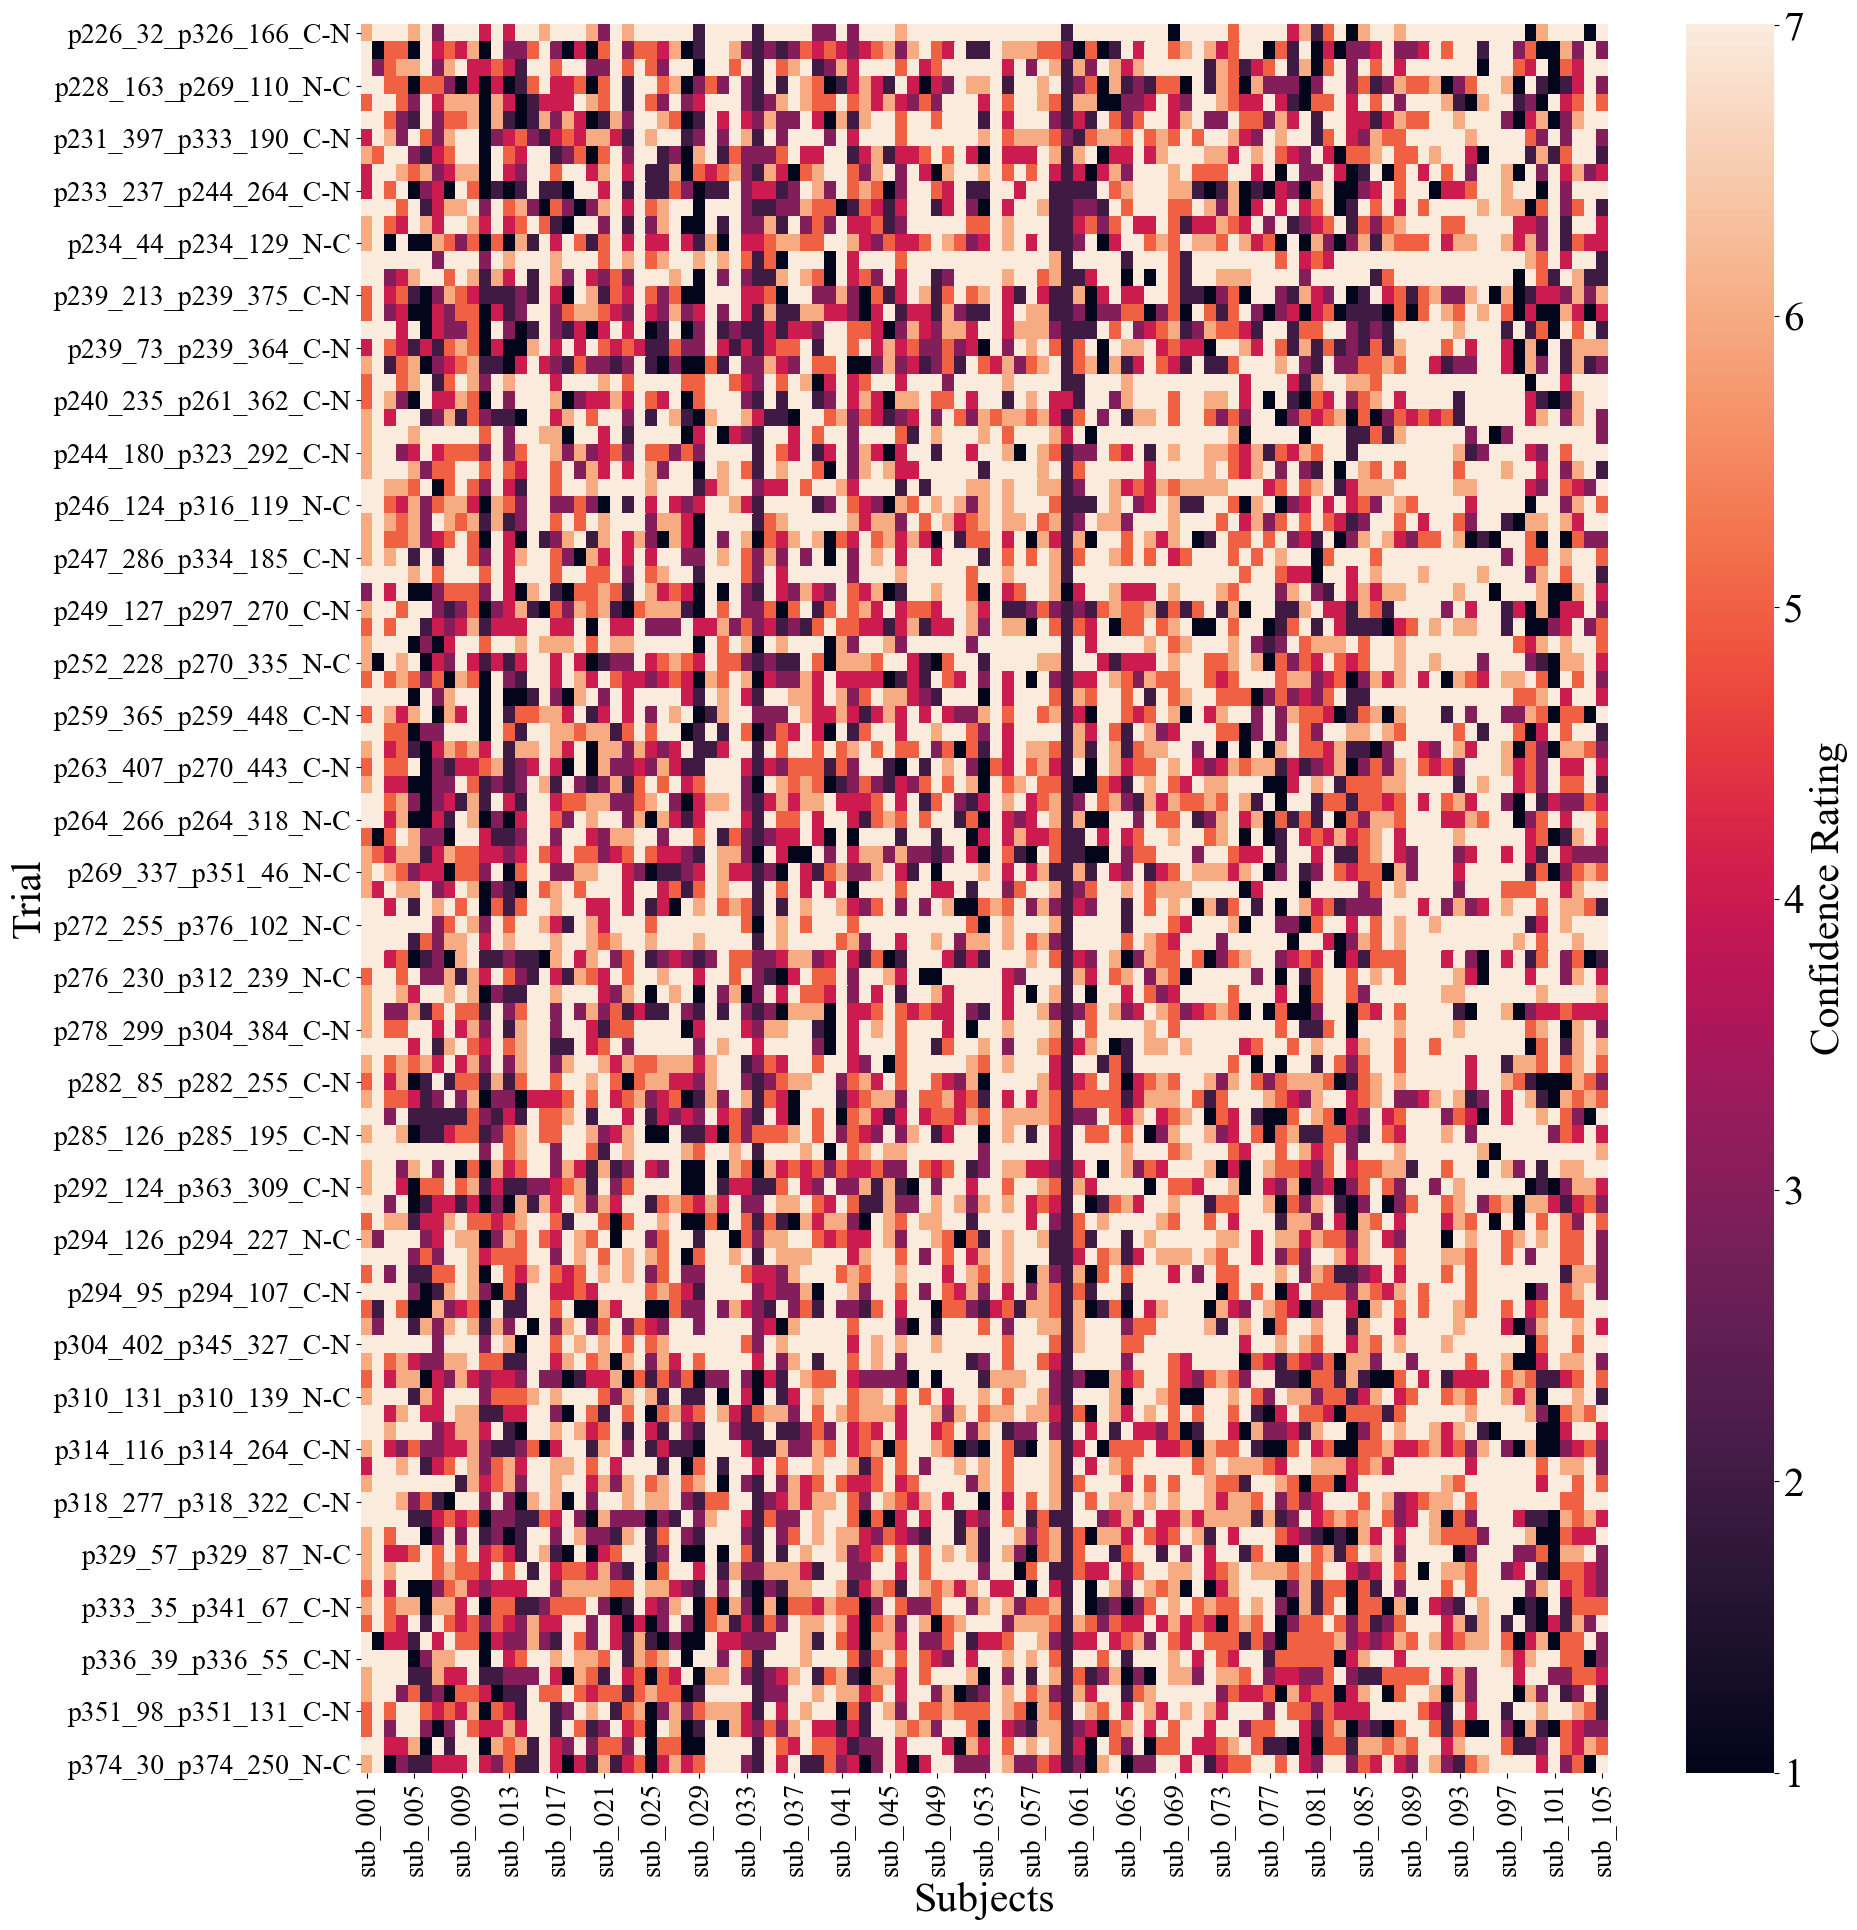

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(data=matrix, ax=ax, cbar_kws={'label': 'Confidence Rating'})
ax.set_xlabel('Subjects')
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('trial_matrix.png')

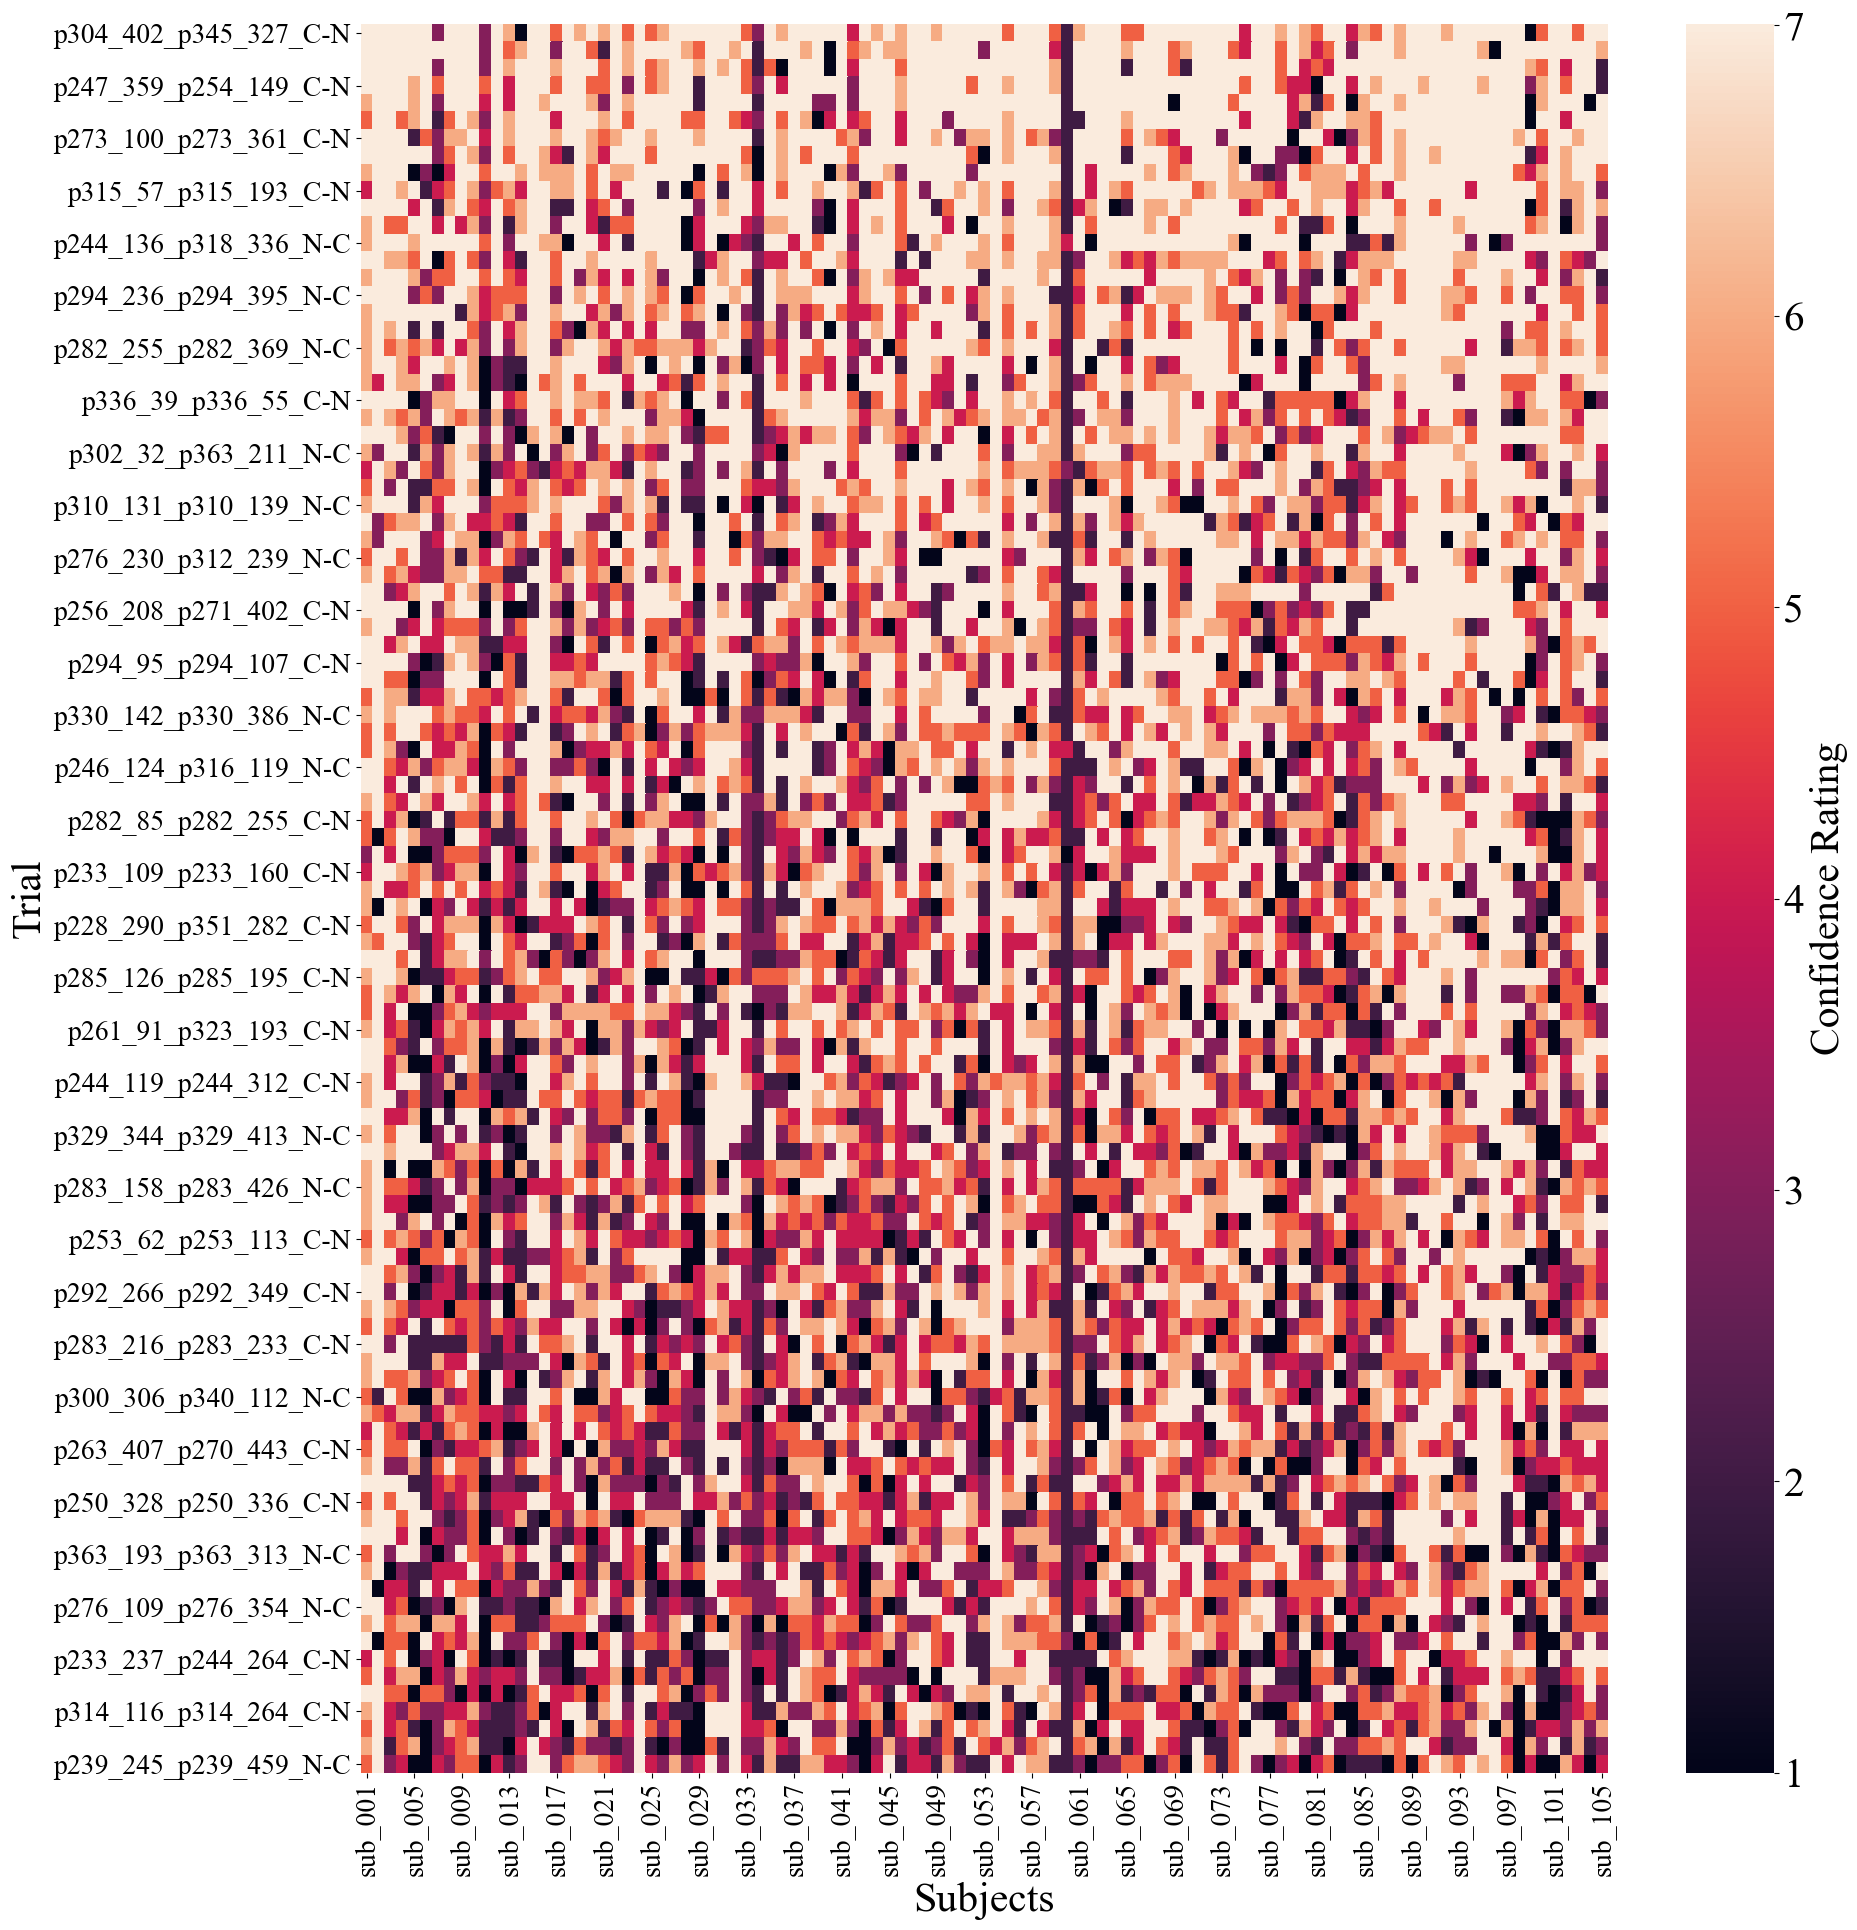

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(data=matrix_sorted, ax=ax, cbar_kws={'label': 'Confidence Rating'})
ax.set_xlabel('Subjects')
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('trial_sorted_matrix.png')